# **Preprocessing**

### **Mengimport Library yang dibutuhkan**

In [94]:
# Mengimport library pandas dan memberikan alias pd. Pandas digunakan untuk manipulasi dan analisis data.
import pandas as pd  
# Mengimport library joblib. Joblib digunakan untuk menyimpan dan memuat model atau objek Python ke/dari disk.
import joblib  
# Mengimport library matplotlib.pyplot dan memberikan alias plt. Matplotlib.pyplot digunakan untuk visualisasi data dan membuat grafik.
import matplotlib.pyplot as plt  
# Mengimport fungsi accuracy_score dan classification_report dari library sklearn.metrics. accuracy_score digunakan untuk mengukur akurasi model, classification_report memberikan laporan klasifikasi yang lengkap.
from sklearn.metrics import accuracy_score, classification_report  
# Mengimport fungsi train_test_split dari library sklearn.model_selection. Fungsi ini digunakan untuk membagi data menjadi subset data pelatihan dan data pengujian.
from sklearn.model_selection import train_test_split  
# Mengimport kelas KNeighborsClassifier dari library sklearn.neighbors. Kelas ini digunakan untuk melakukan klasifikasi dengan algoritma K-Nearest Neighbors (K-NN).
from sklearn.neighbors import KNeighborsClassifier  
# Mengimport kelas DecisionTreeClassifier dari library sklearn.tree. Kelas ini digunakan untuk melakukan klasifikasi dengan menggunakan pohon keputusan.
from sklearn.tree import DecisionTreeClassifier  
# Mengimport kelas RandomForestClassifier dari library sklearn.ensemble. Kelas ini digunakan untuk melakukan klasifikasi dengan menggunakan metode Random Forest.
from sklearn.ensemble import RandomForestClassifier  
# Mengimport kelas GaussianNB dari library sklearn.naive_bayes. Kelas ini digunakan untuk melakukan klasifikasi dengan menggunakan Naive Bayes.
from sklearn.naive_bayes import GaussianNB  


### **Memuat data**

In [95]:

# Membaca file CSV 'train.csv' dan menyimpan datanya ke dalam sebuah DataFrame yang disebut df.
df = pd.read_csv('train.csv')
# Menggunakan atribut shape pada objek DataFrame df untuk mengembalikan dimensi (jumlah baris, jumlah kolom) dari DataFrame.
shape = df.shape


Dapat dilihat bahwa dataset ini memiliki 2001 entri data dan 21 kolom atribut. Pada deskripsi dataset mobile price, dataset ini memiliki 20 attribut dan 1 class target.

In [96]:
# Menampilkan 5 baris pertama dari DataFrame df.
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### **Melihat Value dari Target Class**
pada dataset ini, 'price_range' merupakan target class. sekarang saya akan melihat apa saja isi dari target class tersebut

In [97]:
# Menampilkan nilai unik pada kolom 'price_range' dalam DataFrame df.
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

'price_range' memiliki 4 value yaitu berupa angka 0 sampai dengan 3. Dari deskripsi pada dataset ini, berikut maksud dari 4 value class target tersebut:

- Class 0: Harga paling rendah
- Class 1: Harga sedang
- Class 2: Harga sedikit lebih mahal
- Class 3: Harga paling mahal

### **Memilih fitur**

In [98]:
# Menampilkan nama-nama kolom dalam DataFrame df.
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Disini saya akan menggunakan semua fitur yang ada

### **Menangani nilai yang hilang**

In [99]:
# Menghitung jumlah nilai null pada setiap kolom dalam DataFrame df.
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Terlihat disini bahwa dataset yang digunakan tidak memiliki missing value. Jadi tidak perlu untuk ditindak lanjuti.

### **Menghapus data yang tidak relevan**
Semua data yang ada berpengaruh dalam proses prediksi alias semua data sudah relevan dan tidak perlu menghapus apapun 

### **Mengubah data kategorikal menjadi numerik**

In [100]:
# Menampilkan tipe data dari setiap kolom dalam DataFrame df.
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

Semua data sudah merupakan tipe data numerik yang terdiri dari tipe data Integer dan Float. Jadi tidak memerlukan konversi tipe data

### **Membuat variabel atribut/fitur dan variabel target class¶**
Setelah eksplorasi data selesai, saatnya untuk memulai membuat model. Langkah pertama, saya membuat variabel khusus untuk dataframe yang berisi atribut/fitur dan target class

In [101]:
# membuang kolom 'price_range' dari dataframe
X = df.drop(['price_range'], axis=1) 
# hanya mengambil kolom 'price_range' dari dataframe
y = df['price_range']

### **Memisahkan data menjadi set pelatihan dan pengujian**

In [102]:
# Membagi data menjadi subset data pelatihan dan data pengujian dengan perbandingan 75:25.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Saya memisahkan data traning dan data testing dengan rasio 75:25

In [103]:
# Menampilkan dimensi (jumlah baris, jumlah kolom) dari subset data pelatihan dan data pengujian.
X_train.shape, X_test.shape

((1500, 20), (500, 20))

## **Training Menggunakan KNN**

In [104]:
# Membuat model K-NN dengan menggunakan 5 tetangga terdekat.
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [105]:
# Memprediksi target (y) dengan menggunakan model yang telah dilatih.
y_pred = model.predict(X_test)
y_pred

array([2, 0, 0, 1, 0, 3, 2, 0, 3, 3, 3, 0, 2, 0, 3, 1, 0, 3, 1, 3, 0, 3,
       0, 2, 3, 1, 1, 1, 2, 0, 0, 0, 0, 0, 3, 2, 1, 2, 1, 2, 1, 0, 0, 3,
       1, 1, 1, 1, 2, 1, 0, 2, 3, 0, 0, 1, 0, 1, 2, 2, 3, 3, 3, 1, 1, 3,
       2, 1, 0, 1, 1, 0, 3, 3, 3, 1, 1, 3, 0, 1, 0, 2, 3, 3, 0, 1, 0, 2,
       1, 1, 1, 0, 2, 2, 3, 0, 0, 2, 3, 0, 2, 3, 3, 2, 0, 0, 1, 0, 2, 3,
       3, 3, 2, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 0, 0, 1, 3, 0, 2, 1, 1, 3,
       0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 3, 3, 0, 3, 1, 0, 2, 1, 2, 0, 3, 3,
       3, 3, 2, 3, 0, 2, 3, 2, 1, 2, 1, 1, 1, 2, 1, 3, 2, 0, 2, 1, 3, 0,
       3, 0, 2, 1, 2, 2, 1, 1, 3, 3, 1, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 0,
       2, 0, 0, 1, 3, 2, 2, 2, 0, 2, 1, 0, 3, 3, 2, 3, 1, 2, 1, 0, 2, 3,
       2, 1, 1, 3, 1, 0, 2, 0, 3, 2, 2, 3, 0, 0, 3, 2, 1, 1, 0, 2, 2, 1,
       1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 2, 3, 1, 1, 1, 2, 2, 3, 2, 1,
       0, 2, 0, 3, 0, 2, 2, 2, 0, 1, 0, 3, 3, 2, 0, 1, 1, 1, 0, 1, 1, 0,
       3, 2, 0, 2, 1, 2, 3, 2, 1, 2, 2, 2, 1, 2, 2,

In [106]:
# Menghitung akurasi model K-NN.
acc_knn = accuracy_score(y_pred, y_test) * 100
print('Akurasi Model K-NN: ' + str(round(acc_knn, 2)) + '%')

Akurasi Model K-NN: 91.8%


In [107]:
# Membuat laporan klasifikasi model K-NN.
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       127
           1       0.89      0.88      0.88       129
           2       0.88      0.91      0.89       127
           3       0.93      0.97      0.95       117

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



In [108]:
# Menyimpan model K-NN ke dalam file 'model_knn.pkl'.
joblib.dump(model, 'model_knn.pkl')

['model_knn.pkl']

## **Training Menggunakan Naive Bayes**

In [109]:
# Membuat model Naive Bayes.
model = GaussianNB()
# Melatih model dengan data training
model.fit(X_train, y_train)

GaussianNB()

In [110]:
# Memprediksi target (y) dengan menggunakan model Naive Bayes.
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 3, 2, 0, 2, 3, 3, 0, 2, 0, 3, 2, 0, 3, 1, 3, 0, 3,
       0, 1, 3, 1, 1, 2, 2, 0, 0, 0, 0, 1, 3, 2, 2, 2, 1, 1, 2, 0, 0, 2,
       1, 2, 1, 1, 2, 1, 0, 2, 3, 0, 0, 1, 0, 1, 2, 2, 3, 3, 3, 0, 1, 2,
       2, 1, 0, 1, 1, 0, 2, 3, 3, 1, 2, 2, 0, 1, 0, 2, 3, 3, 1, 2, 0, 3,
       2, 2, 1, 0, 2, 2, 3, 0, 0, 2, 3, 0, 2, 3, 2, 1, 0, 1, 1, 0, 2, 3,
       3, 3, 2, 1, 2, 0, 0, 3, 0, 3, 1, 2, 1, 0, 0, 1, 3, 0, 3, 1, 2, 3,
       0, 0, 2, 3, 2, 0, 0, 0, 3, 2, 2, 3, 0, 3, 1, 0, 2, 2, 2, 0, 3, 3,
       3, 2, 2, 2, 0, 2, 3, 2, 1, 1, 1, 2, 1, 2, 1, 3, 2, 0, 2, 2, 3, 0,
       3, 0, 1, 1, 2, 2, 1, 2, 3, 3, 1, 1, 1, 0, 2, 2, 1, 2, 1, 0, 1, 0,
       2, 0, 1, 1, 3, 2, 2, 3, 0, 2, 1, 0, 3, 3, 2, 3, 1, 2, 1, 1, 2, 3,
       2, 0, 1, 3, 1, 0, 2, 0, 3, 3, 2, 3, 0, 0, 3, 1, 1, 1, 1, 2, 2, 1,
       1, 3, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 1, 3, 1, 1, 0, 2, 2, 3, 2, 1,
       0, 1, 0, 3, 0, 2, 2, 2, 0, 0, 0, 3, 3, 2, 0, 1, 1, 0, 0, 1, 1, 0,
       3, 2, 0, 1, 2, 1, 3, 1, 1, 2, 2, 3, 1, 3, 2,

In [111]:
# Menghitung akurasi model Naive Bayes.
acc_nb = accuracy_score(y_pred, y_test)*100
print('Akurasi Model : ' + str(round(acc_nb, 2)) + ' %.')

Akurasi Model : 77.8 %.


In [112]:
# Membuat laporan klasifikasi model Naive Bayes.
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       125
           1       0.67      0.67      0.67       127
           2       0.72      0.70      0.71       133
           3       0.86      0.91      0.89       115

    accuracy                           0.78       500
   macro avg       0.78      0.78      0.78       500
weighted avg       0.78      0.78      0.78       500



In [113]:
# Menyimpan model Naive Bayes ke dalam file 'model_nb.pkl'.
joblib.dump(model, 'model_nb.pkl')

['model_nb.pkl']

## **Training Menggunakan Decision Tree**

In [114]:
# Membuat model Decision Tree.
model = DecisionTreeClassifier()
# Melatih model dengan data training
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [115]:
# Memprediksi target (y) dengan menggunakan model Decision Tree.
y_pred = model.predict(X_test)
y_pred

array([2, 0, 0, 1, 0, 3, 2, 0, 3, 3, 3, 0, 2, 0, 3, 2, 0, 3, 1, 3, 0, 3,
       0, 2, 3, 2, 1, 2, 2, 0, 0, 0, 1, 0, 3, 2, 2, 2, 1, 2, 1, 0, 0, 3,
       1, 1, 1, 0, 2, 1, 0, 2, 3, 0, 0, 1, 0, 2, 2, 2, 3, 2, 3, 1, 1, 3,
       2, 1, 0, 1, 0, 0, 2, 2, 3, 1, 2, 2, 0, 1, 0, 2, 3, 3, 0, 1, 0, 2,
       1, 1, 1, 0, 2, 2, 3, 0, 0, 2, 3, 0, 3, 3, 3, 2, 0, 1, 1, 0, 2, 3,
       3, 3, 2, 0, 1, 1, 0, 3, 0, 2, 1, 3, 1, 0, 0, 2, 3, 0, 2, 1, 1, 3,
       0, 0, 2, 3, 2, 0, 0, 0, 3, 2, 3, 3, 0, 3, 1, 0, 2, 2, 2, 0, 3, 3,
       3, 2, 2, 3, 0, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 0, 2, 2, 3, 1,
       3, 0, 2, 1, 2, 2, 1, 1, 3, 3, 1, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 0,
       3, 0, 0, 0, 3, 2, 1, 2, 0, 1, 1, 0, 3, 3, 2, 3, 0, 2, 1, 0, 3, 3,
       1, 1, 1, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 0, 3, 1, 1, 1, 0, 2, 2, 1,
       1, 3, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 3, 2, 1,
       0, 2, 0, 3, 0, 2, 2, 2, 0, 0, 0, 3, 3, 2, 0, 1, 1, 0, 0, 1, 1, 0,
       3, 2, 0, 1, 2, 2, 3, 1, 1, 2, 2, 2, 1, 3, 2,

In [116]:
# Menghitung akurasi model Decision Tree.
acc_dt = accuracy_score(y_pred, y_test)*100
print('Akurasi Model : ' + str(round(acc_dt, 2)) + ' %.')

Akurasi Model : 80.4 %.


In [117]:
# Membuat laporan klasifikasi model Decision Tree.
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       128
           1       0.72      0.74      0.73       124
           2       0.72      0.74      0.73       125
           3       0.88      0.87      0.87       123

    accuracy                           0.80       500
   macro avg       0.81      0.80      0.80       500
weighted avg       0.81      0.80      0.81       500



In [118]:
# Menyimpan model Decision Tree ke dalam file 'model_dt.pkl'.
joblib.dump(model, 'model_dt.pkl')

['model_dt.pkl']

## **Training Menggunakan Random Forest**

In [119]:
# Membuat model Random Forest dengan 100 pohon dan random state=1.
model = RandomForestClassifier(n_estimators=100, random_state=1)
# Melatih model dengan data training
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [120]:
# Memprediksi target (y) dengan menggunakan model Random Forest.
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 3, 2, 0, 3, 3, 3, 0, 2, 0, 3, 2, 0, 3, 1, 3, 0, 3,
       0, 1, 3, 1, 1, 2, 2, 0, 0, 0, 0, 0, 3, 2, 2, 2, 1, 1, 1, 0, 0, 2,
       1, 1, 1, 1, 3, 1, 0, 2, 3, 0, 0, 1, 0, 1, 2, 2, 2, 2, 3, 1, 1, 3,
       2, 1, 0, 1, 1, 0, 2, 3, 3, 1, 1, 3, 0, 1, 0, 2, 3, 3, 0, 1, 0, 2,
       2, 1, 1, 0, 2, 2, 3, 0, 0, 2, 3, 0, 2, 3, 3, 2, 0, 1, 1, 0, 2, 3,
       3, 3, 2, 1, 2, 0, 0, 3, 0, 3, 1, 3, 1, 0, 0, 1, 3, 0, 2, 1, 2, 3,
       0, 0, 2, 3, 2, 0, 0, 0, 3, 2, 3, 3, 0, 3, 1, 0, 2, 2, 2, 0, 3, 3,
       3, 3, 2, 2, 0, 2, 3, 2, 1, 1, 1, 1, 1, 2, 1, 3, 2, 0, 2, 2, 3, 0,
       3, 0, 1, 1, 2, 2, 1, 1, 3, 3, 1, 0, 1, 0, 2, 2, 1, 2, 1, 0, 1, 0,
       2, 0, 1, 0, 3, 2, 2, 3, 0, 2, 1, 0, 3, 3, 2, 3, 1, 2, 1, 0, 2, 3,
       2, 1, 1, 3, 1, 0, 2, 0, 3, 3, 2, 3, 0, 0, 3, 1, 1, 1, 0, 2, 2, 1,
       1, 3, 0, 0, 1, 0, 0, 0, 3, 0, 1, 2, 2, 3, 1, 1, 0, 2, 3, 3, 2, 1,
       0, 2, 0, 3, 0, 2, 2, 2, 0, 1, 0, 3, 3, 2, 0, 1, 1, 0, 0, 1, 1, 0,
       3, 2, 0, 1, 1, 1, 3, 2, 2, 2, 2, 3, 1, 3, 2,

In [121]:
# Menghitung akurasi model Random Forest.
acc_rf = accuracy_score(y_pred, y_test)*100
print('Akurasi Model : ' + str(round(acc_rf, 2)) + ' %.')

Akurasi Model : 85.4 %.


In [122]:
# Membuat laporan klasifikasi model Random Forest.
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       131
           1       0.79      0.80      0.79       125
           2       0.77      0.81      0.79       123
           3       0.91      0.92      0.91       121

    accuracy                           0.85       500
   macro avg       0.86      0.85      0.85       500
weighted avg       0.86      0.85      0.86       500



In [123]:
# Menyimpan model Random Forest ke dalam file 'model_rf.pkl'.
joblib.dump(model, 'model_rf.pkl')

['model_rf.pkl']

## **Perbandingan Akurasi Model**

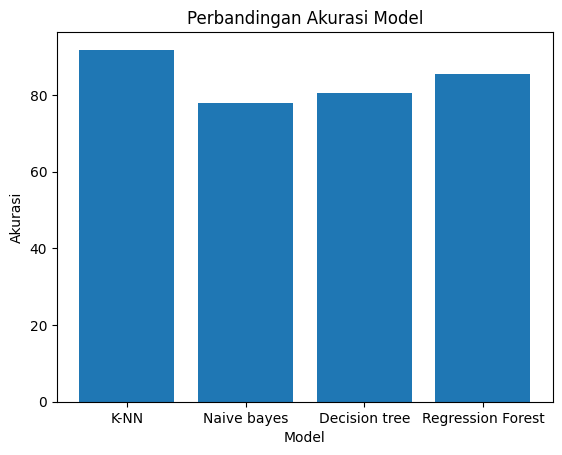

In [124]:
# Menampilkan perbandingan akurasi dari empat model.
# Menyimpan nama-nama model dalam sebuah list.
model = ['K-NN', 'Naive bayes', 'Decision tree', 'Regression Forest']

# Menyimpan nilai akurasi dari masing-masing model dalam sebuah list.
akurasi = [acc_knn, acc_nb, acc_dt, acc_rf]

# Membuat grafik batang untuk membandingkan akurasi model.
plt.bar(model, akurasi)

# Menyertakan label untuk sumbu x (Model).
plt.xlabel('Model')

# Menyertakan label untuk sumbu y (Akurasi).
plt.ylabel('Akurasi')

# Menyertakan judul untuk grafik.
plt.title('Perbandingan Akurasi Model')

# Menampilkan grafik batang.
plt.show()

